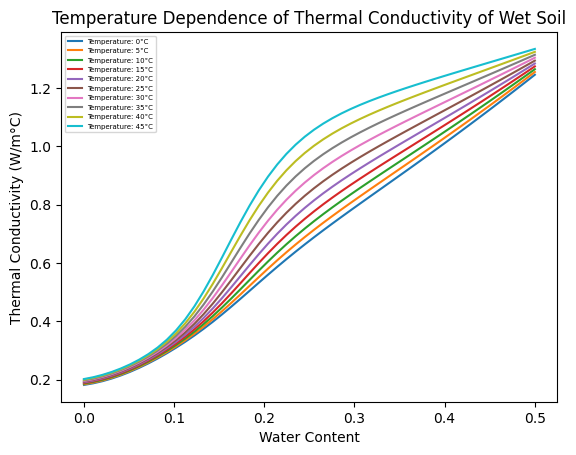

In [33]:
#4.1
#from math import exp
import matplotlib.pyplot as plt
import numpy as np
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *
# Define parameters
bulkDensity = 1300  # kg/m^3
clay = 0.4  # Assume clay content of soil
waterContents = np.linspace(0, 0.5, 50)  # Vary water content from 0 to 50%
temperatures = range(0, 100, 10)  # Temperature range from 0°C to 50°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water Content')
plt.ylabel('Thermal Conductivity (W/m°C)')
plt.title('Temperature Dependence of Thermal Conductivity of Wet Soil')
plt.legend(fontsize='5')
plt.grid(False)
plt.show()

In [4]:
#4.3
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from PSP_heatSoil import*
bulkdensity=1300 #kg/m3
clay=0.4
T_0= 20 #initial temperature
thetaIni=0.3  #soil water content
solver=1
z = initialize(T_0, thetaIni, solver)
aitT= 25 #air temperature
boundryT= 15 #boundary temperature in celcius
dt=3600 #time in second
solver= 'cell_cent_fin_vol'
cellCentFiniteVol(airT, initials, dt)
plt.plot (T, z, label='soiltemperature')
plt.xlabel ('temperature(C)')
plt.ylable('Depth(cm)')
plt.title('Soil temperature as a function with time and depth')
plt.legend()
plt.grid(True)
plt.show()

            


<class 'NameError'>: name 'initialize' is not defined

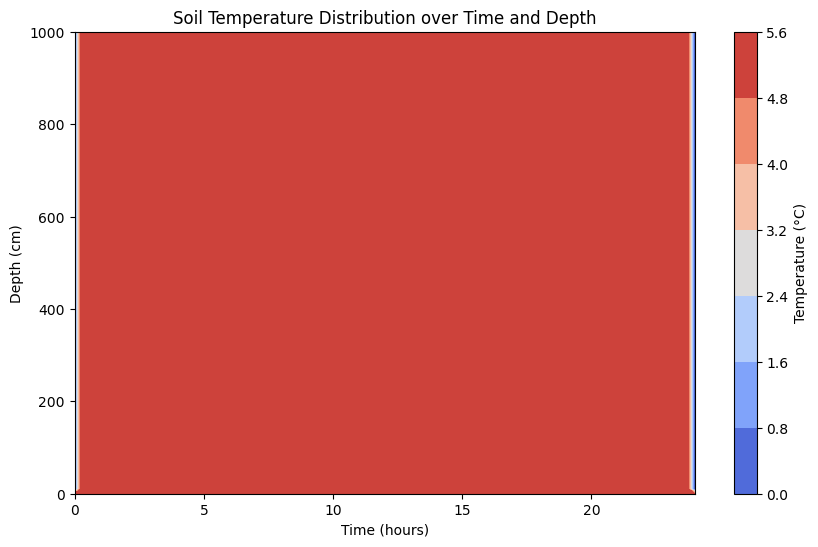

In [32]:
#4.3
import numpy as np
import matplotlib.pyplot as plt

# Constants
thermal_conductivity = 0.3  # W/mK (example value)
specific_heat_capacity = 1000  # J/kgK (example value)
density = 1300  # kg/m^3 (example value)
depths = np.linspace(0, 1000, 100)  # Depth from surface (cm)
time_steps = np.linspace(0, 24*3600, 100)  # Time in seconds (1 day)

# Boundary conditions
surface_temperature = 45  # Celsius (example value)
initial_temperature = 5  # Celsius (example value)

# Initialize temperature array
temperature = np.zeros((len(depths), len(time_steps)))
temperature[:, 0] = initial_temperature

# Simulation
dt = time_steps[1] - time_steps[0]
dz = depths[1] - depths[0]

for t in range(1, len(time_steps)):
    for z in range(1, len(depths) - 1):
        dTdz = (temperature[z + 1, t - 1] - temperature[z - 1, t - 1]) / (2 * dz)
        d2Tdz2 = (temperature[z + 1, t - 1] - 2 * temperature[z, t - 1] + temperature[z - 1, t - 1]) / dz**2
        temperature[z, t] = temperature[z, t - 1] + (thermal_conductivity * d2Tdz2 / (density * specific_heat_capacity)) * dt

# Plotting
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(time_steps / 3600, depths)
plt.contourf(X, Y, temperature.T, cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Time (hours)')
plt.ylabel('Depth (cm)')
plt.title('Soil Temperature Distribution over Time and Depth')
plt.show()

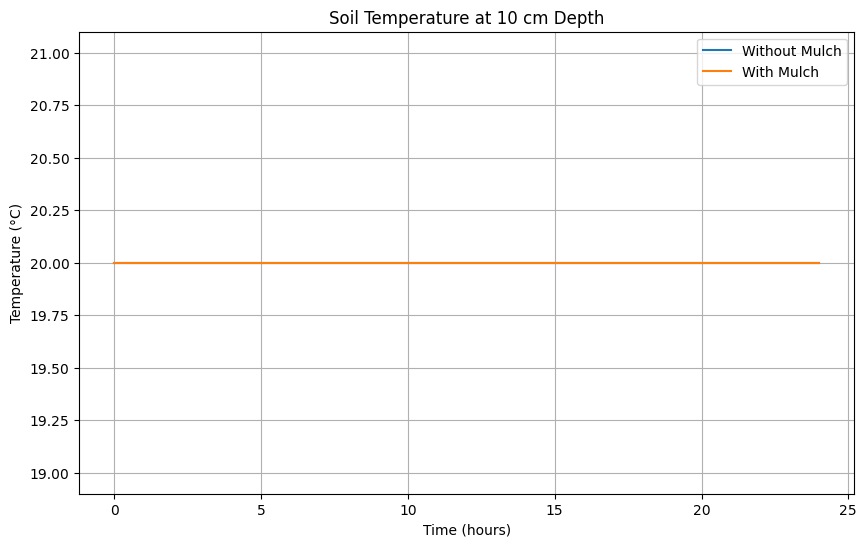

In [24]:

#4.3
import numpy as np
import matplotlib.pyplot as plt

# Constants
thermal_conductivity = 0.1  # W/mK (example value)
specific_heat_capacity = 1000  # J/kgK (example value)
density = 1500  # kg/m^3 (example value)
depths = np.linspace(0, 100, 100)  # Depth from surface (cm)
time_steps = np.linspace(0, 24*3600, 100)  # Time in seconds (1 day)

# Boundary conditions
surface_temperature = 20  # Celsius (example value)
initial_temperature = 20  # Celsius (example value)
mulch_insulation_factor = 0000.1 # Example value, adjust as needed

# Initialize temperature arrays for scenarios with and without mulch
temperature_no_mulch = np.zeros((len(depths), len(time_steps)))
temperature_mulch = np.zeros((len(depths), len(time_steps)))
temperature_no_mulch[:, 0] = initial_temperature
temperature_mulch[:, 0] = initial_temperature

# Simulate temperature distribution without mulch
for t in range(1, len(time_steps)):
    for z in range(1, len(depths) - 1):
        d2Tdz2 = (temperature_no_mulch[z + 1, t - 1] - 2 * temperature_no_mulch[z, t - 1] + temperature_no_mulch[z - 1, t - 1]) / (depths[z] - depths[z - 1])**2
        temperature_no_mulch[z, t] = temperature_no_mulch[z, t - 1] + (thermal_conductivity * d2Tdz2 / (density * specific_heat_capacity)) * (time_steps[t] - time_steps[t - 1])

# Simulate temperature distribution with mulch
for t in range(1, len(time_steps)):
    for z in range(1, len(depths) - 1):
        # Adjust thermal conductivity for mulched layers
        if depths[z] < 5:  # Depth threshold for mulch presence (adjust as needed)
            thermal_conductivity_eff = thermal_conductivity * mulch_insulation_factor
        else:
            thermal_conductivity_eff = thermal_conductivity
        
        d2Tdz2 = (temperature_mulch[z + 1, t - 1] - 2 * temperature_mulch[z, t - 1] + temperature_mulch[z - 1, t - 1]) / (depths[z] - depths[z - 1])**2
        temperature_mulch[z, t] = temperature_mulch[z, t - 1] + (thermal_conductivity_eff * d2Tdz2 / (density * specific_heat_capacity)) * (time_steps[t] - time_steps[t - 1])

# Plot temperature distributions
plt.figure(figsize=(10, 6))
plt.plot(time_steps / 3600, temperature_no_mulch[10, :], label='Without Mulch')
plt.plot(time_steps / 3600, temperature_mulch[10, :], label='With Mulch')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Soil Temperature at 10 cm Depth')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#4.7
import PSP_grid as grid
from PSP_ThomasAlgorithm import *
import numpy as np
from PSP_heatSoil import *
import piplite
await piplite.install ('matplotlib')

%run PSP_heat.py